# Bank Transaction Category Predictive Model

## Import Libraries

In [10]:
# import data 


## Load and Understand Data

In [11]:
import pandas as pd
import re

bank_transactions = pd.read_csv("bank_transaction.csv")
user_profiles = pd.read_csv("user_profile.csv")

print("Bank Transaction Data : \n", bank_transactions.head().to_string())
print("User Profile Data : \n", user_profiles.head().to_string())

Bank Transaction Data : 
    client_id  bank_id  account_id  txn_id             txn_date                                                                                                                       description  amount         category
0          1        1           1       4  2023-09-29 00:00:00                                                                           Earnin           PAYMENT                 Donatas Danyal    20.0            Loans
1          1        1           1       3  2023-08-14 00:00:00                                                       ONLINE TRANSFER FROM NDonatas DanyalDA O CARSON BUSINESS CHECKING 1216 1216    25.0  Transfer Credit
2          1        1           1       5  2023-09-25 00:00:00  MONEY TRANSFER                          AUTHORIZED ON   09/25 FROM Earnin CDAEJ_B                     CA  S583269001208168   111    20.0            Loans
3          1        1           2       1  2023-06-02 00:00:00                                        

In [12]:
# display information on imported data
print("Bank Transaction Info :")
print(bank_transactions.info())
print()

print("User Profile Info :")
print(user_profiles.info())

Bank Transaction Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258779 entries, 0 to 258778
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   client_id    258779 non-null  int64  
 1   bank_id      258779 non-null  int64  
 2   account_id   258779 non-null  int64  
 3   txn_id       258779 non-null  int64  
 4   txn_date     258779 non-null  object 
 5   description  258779 non-null  object 
 6   amount       258779 non-null  float64
 7   category     258522 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 15.8+ MB
None

User Profile Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CLIENT_ID                      1000 non-null   int64
 1   IS_INTERESTED_INVESTMENT       1000 non-null   bool 
 2   IS_IN

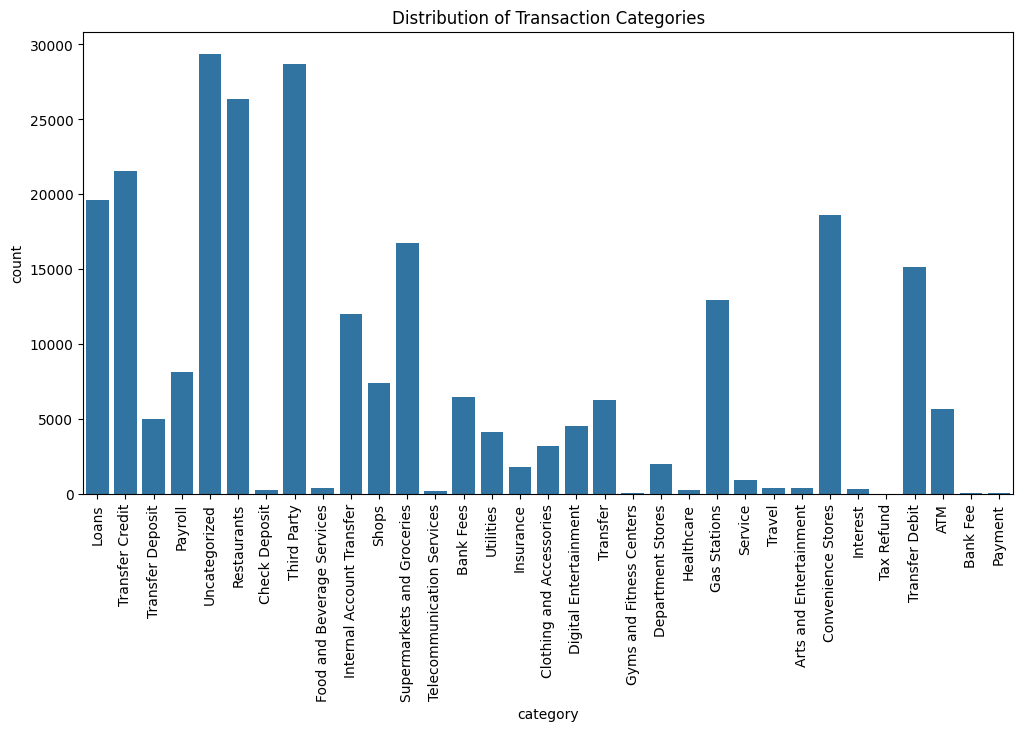

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of transaction categories
plt.figure(figsize=(12, 6))
sns.countplot(data=bank_transactions, x='category')
plt.title('Distribution of Transaction Categories')
plt.xticks(rotation=90)
plt.show()
    


# Step 1 : Data Preprocessing

## Drop NaN Value

In [14]:
# Check the count of NaN values in each column
nan_counts = bank_transactions.isna().sum()

print("NaN counts for each column in 'bank_transactions':")
print(nan_counts)

# Show the count of rows before and after dropping
print(f"\nTotal rows before dropping: {len(bank_transactions)}")

# Drop rows with NaN values in the 'description' column
bank_transactions = bank_transactions.dropna(subset=['category'])

print(f"Total rows after dropping: {len(bank_transactions)}")

NaN counts for each column in 'bank_transactions':
client_id        0
bank_id          0
account_id       0
txn_id           0
txn_date         0
description      0
amount           0
category       257
dtype: int64

Total rows before dropping: 258779
Total rows after dropping: 258522


## Preprocess Data before Tokenization

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Function to ensure the required nltk data packages are downloaded
def ensure_nltk_data():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')

ensure_nltk_data()  

# Cached Stopwords / Pattern outside functions and reused to reduce time complexity

# Initialize the Lemmatizer and Stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Compile regex patterns
space_pattern = re.compile(r'\s+')
non_word_pattern = re.compile(r'\W+')

def preprocess_description(description):
    # Remove extra spaces and punctuation
    description = space_pattern.sub(' ', description)  # Replace multiple spaces with one
    description = non_word_pattern.sub(' ', description)  # Replace non-word characters with space
    description = description.lower().strip()  # Remove leading and trailing spaces
    
    # Tokenization
    tokens = word_tokenize(description)
    # Removing Stopwords and Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)


print("\nBefore Cleaning Bank Transaction Data : Descriptions \n", bank_transactions['description'].head(10).to_string())

# Apply preprocessing to descriptions
bank_transactions['cleaned_description'] = bank_transactions['description'].apply(preprocess_description)

print("\nAfter Cleaning Bank Transaction Data : Descriptions\n", bank_transactions['cleaned_description'].head(10).to_string())



Before Cleaning Bank Transaction Data : Descriptions 
 0    Earnin           PAYMENT                 Donat...
1    ONLINE TRANSFER FROM NDonatas DanyalDA O CARSO...
2    MONEY TRANSFER                          AUTHOR...
3    ONLINE TRANSFER FROM CARSON N EVERYDAY CHECKIN...
4    ONLINE TRANSFER FROM CARSON N EVERYDAY CHECKIN...
5                        Deposit from 360 Checking 924
6                                              ISD #11
7                        Deposit from 360 Checking 924
8    360 Checking Card Adjustment Signature (Credit...
9                                              ISD #11


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnston.yap_doctoro\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package wordnet is already up-to-date!


## Feature Extraction - TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(bank_transactions['cleaned_description'])

# The tfidf_matrix is now in sparse format and won't be converted to a dense DataFrame.
print(f"Shape of TF-IDF sparse matrix: {tfidf_matrix.shape}")
print(tfidf_matrix)


In [ ]:
from sklearn.model_selection import train_test_split

# Point out 'category' as the target variable for the prediction of transaction category
X = tfidf_matrix
y = bank_transactions['category']

# Split data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training dataset size: {x_train.shape}")
print(f"Testing dataset size: {x_test.shape}")


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model using the training dataset
nb_model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred = nb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=y.unique())

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)